In [1]:
import numpy as np
import itertools
import math
import scipy
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
from matplotlib import animation
from matplotlib import transforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
import dask
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import netCDF4

In [2]:
path = "/DFS-L/DATA/pritchard/gmooers/Workflow/MAPS/SPCAM/100_Days/New_SPCAM5/archive/TimestepOutput_Neuralnet_SPCAM_216/atm/hist/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-20-00000.nc"
extra_variables = xr.open_dataset(path)
ha = extra_variables.hyai.values
hb = extra_variables.hybi.values
PS = 1e5
Pressures_real = PS*ha+PS*hb

fz = 15
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-72000.nc")
levs = np.array(others.variables['lev'])
new = np.flip(levs)
crms = np.arange(1,129,1)
Xs, Zs = np.meshgrid(crms, new)

In [3]:
def latent_space_analysis(Images, title, iden):
    mean_image = np.mean(Images, axis=0)
    var_image = np.std(Images, axis=0)
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,2, figsize=(16,2))
    cs0 = ax[0].imshow(var_image, cmap=cmap)
    ax[0].set_title("Image Standard Deviation")
    cs1 = ax[1].imshow(mean_image, cmap=cmap)
    ax[1].set_title("Image Mean")
    ax[0].set_ylim(ax[0].get_ylim()[::-1])
    ax[1].set_ylim(ax[1].get_ylim()[::-1])
    ax[1].set_xlabel("CRMs")
    ax[0].set_xlabel("CRMs")
    ax[0].set_ylabel("Pressure")
    ax[1].set_yticks([])
    y_ticks = np.arange(1300, 0, -300)
    ax[0].set_yticklabels(y_ticks)
    ax[1].set_yticklabels(y_ticks)
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cs0, cax=cax)
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cs1, cax=cax)
    plt.suptitle(title)
    #plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space_components/"+iden+'_'+title+'.png')
 

In [4]:
z_test_tsne_370 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/2D_PCA_Latent_Space__370.npy")
z_test_tsne_368 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/2D_PCA_Latent_Space__368.npy")
z_test_tsne_369 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/2D_PCA_Latent_Space__369.npy")


Test_Images = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Space_Time_W_Test.npy")
Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Space_Time_Min_Scalar.npy")
Test_Images = np.interp(Test_Images, (0, 1), (Min_Scalar, Max_Scalar))

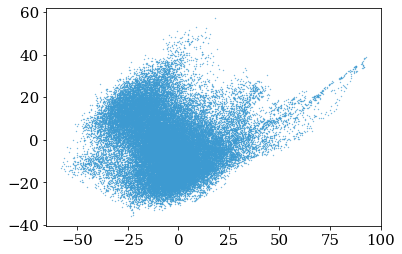

In [63]:
plt.scatter(x=z_test_tsne_370[:, 0], y=z_test_tsne_370[:, 1], c="#3D9AD1", s=0.1)
plt.show()

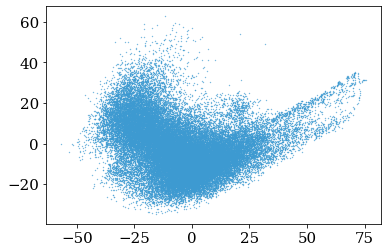

In [64]:
plt.scatter(x=z_test_tsne_368[:, 0], y=z_test_tsne_368[:, 1], c="#3D9AD1", s=0.1)
plt.show()

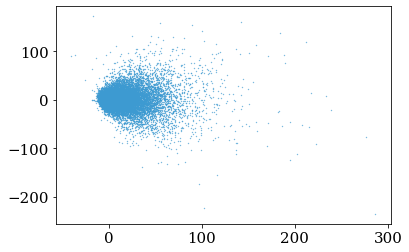

In [65]:
plt.scatter(x=z_test_tsne_369[:, 0], y=z_test_tsne_369[:, 1], c="#3D9AD1", s=0.1)
#plt.xlim(-100, 100)
#plt.ylim(-100, 100)
plt.show()

## X Axis Comparison

(340, 2)


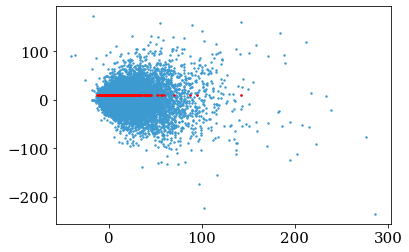

In [66]:
horz_line = np.squeeze(np.argwhere(np.logical_and(z_test_tsne_369[:,1] > 9.67, z_test_tsne_369[:,1] < 10.32)))
horz_line_images = Test_Images[horz_line,:,:]
horz_line_latent = z_test_tsne_369[horz_line,:]

horz_line_images_sorted = np.empty(horz_line_images.shape)
horz_line_latent_sorted = np.empty(horz_line_latent.shape)

count = 0
for i in range(len(horz_line_images_sorted)):
    ind = np.nanargmin(horz_line_latent[:,0])
    horz_line_images_sorted[count,:] = horz_line_images[ind,:]
    horz_line_latent_sorted[count,:] = horz_line_latent[ind,:]
    horz_line_latent[ind,:] = np.array([1000.0,1000.0])
    count = count+1
 
print(horz_line_latent_sorted.shape)
plt.scatter(x=z_test_tsne_369[:, 0], y=z_test_tsne_369[:, 1], c="#3D9AD1", s=2.0)
plt.scatter(x=horz_line_latent_sorted[:, 0], y=horz_line_latent_sorted[:, 1], c="Red", s=2.0)

In [67]:
x0, y0 = 70, 25 # These are in _pixel_ coordinates!!
x1, y1 = -25, -28
length = int(np.hypot(x1-x0, y1-y0))
x, y = np.linspace(x0, x1, 3*length), np.linspace(y0, y1, 3*length)

In [68]:
shallow_line = np.zeros(shape=(len(x),2))
shallow_line[:,0] = x
shallow_line[:,1] = y

In [69]:
shallow_line.shape

(324, 2)

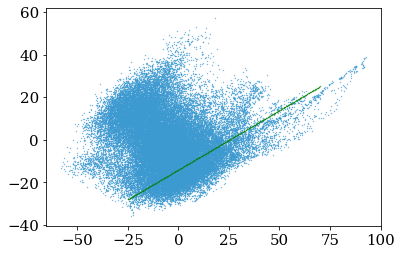

In [70]:
plt.scatter(x=z_test_tsne_370[:, 0], y=z_test_tsne_370[:, 1], c="#3D9AD1", s=0.1)
plt.scatter(x=shallow_line[:, 0], y=shallow_line[:, 1], c="green", s=0.1)
plt.show()

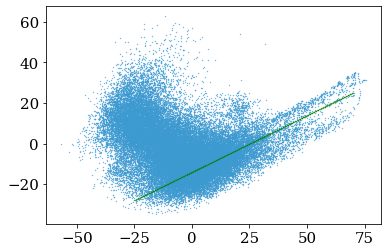

In [71]:
plt.scatter(x=z_test_tsne_368[:, 0], y=z_test_tsne_368[:, 1], c="#3D9AD1", s=0.1)
plt.scatter(x=shallow_line[:, 0], y=shallow_line[:, 1], c="green", s=0.1)
plt.show()

In [72]:
z_test_tsne_saved_368 = np.zeros(z_test_tsne_368.shape)
z_test_tsne_saved_370 = np.zeros(z_test_tsne_370.shape)
for i in range(len(z_test_tsne_368)):
    z_test_tsne_saved_368[i,:] = z_test_tsne_368[i,:]
    z_test_tsne_saved_370[i,:] = z_test_tsne_370[i,:]

In [73]:
def list_maker(original_array, latant_space, image_dataset):
    new_list = np.empty(original_array.shape)
    value_list =np.empty(latant_space[:,0].shape)
    new_images = np.empty(shape=(len(original_array),30,128))
    for i in range(len(original_array)):
        temp_x = original_array[i,0]
        temp_y = original_array[i,1]
        for j in range(len(latant_space)):
            #value_list[j] = np.abs(temp_x-latant_space[j,0])+np.abs(temp_y-latant_space[j,1])
            value_list[j] = np.sqrt((temp_x-latant_space[j,0])**2+(temp_y-latant_space[j,1])**2)
        point = np.argmin(value_list)
        new_list[i,:] = latant_space[point]
        new_images[i,:,:] = image_dataset[point,:,:]
        latant_space[point] = np.array([100000,100000])
        value_list[:] = np.nan
        
    
    return new_list, new_images
        

shallow_list_368, shallow_images_368 = list_maker(shallow_line, z_test_tsne_368, Test_Images)
shallow_list_370, shallow_images_370 = list_maker(shallow_line, z_test_tsne_370, Test_Images)

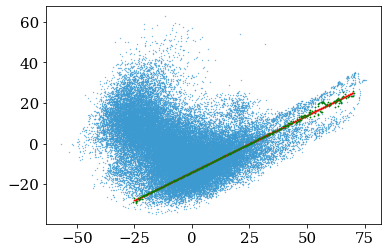

In [74]:
plt.scatter(x=z_test_tsne_saved_368[:, 0], y=z_test_tsne_saved_368[:, 1], c="#3D9AD1", s=0.1)
plt.scatter(x=shallow_line[:, 0], y=shallow_line[:, 1], c="red", s=0.5)
plt.scatter(x=shallow_list_368[:, 0], y=shallow_list_368[:, 1], c="green", s=0.5)

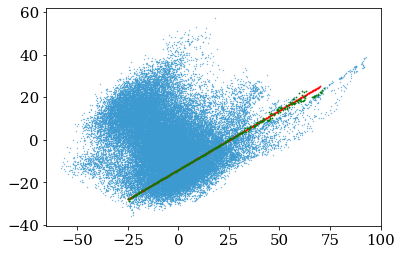

In [75]:
plt.scatter(x=z_test_tsne_saved_370[:, 0], y=z_test_tsne_saved_370[:, 1], c="#3D9AD1", s=0.1)
plt.scatter(x=shallow_line[:, 0], y=shallow_line[:, 1], c="red", s=0.5)
plt.scatter(x=shallow_list_370[:, 0], y=shallow_list_370[:, 1], c="green", s=0.5)

In [76]:
#shallow_line = np.flip(shallow_line, axis=0)
#shallow_list_368 = np.flip(shallow_list_368, axis=0)
#shallow_images_368 = np.flip(shallow_images_368, axis=0)

#shallow_list_370 = np.flip(shallow_list_370, axis=0)
#shallow_images_370 = np.flip(shallow_images_370, axis=0)

In [77]:
horz_line_images_sorted = np.flip(horz_line_images_sorted , axis=0)
horz_line_latent_sorted = np.flip(horz_line_latent_sorted, axis=0)

In [78]:
print(shallow_list_370.shape)
print(shallow_list_368.shape)

(324, 2)
(324, 2)


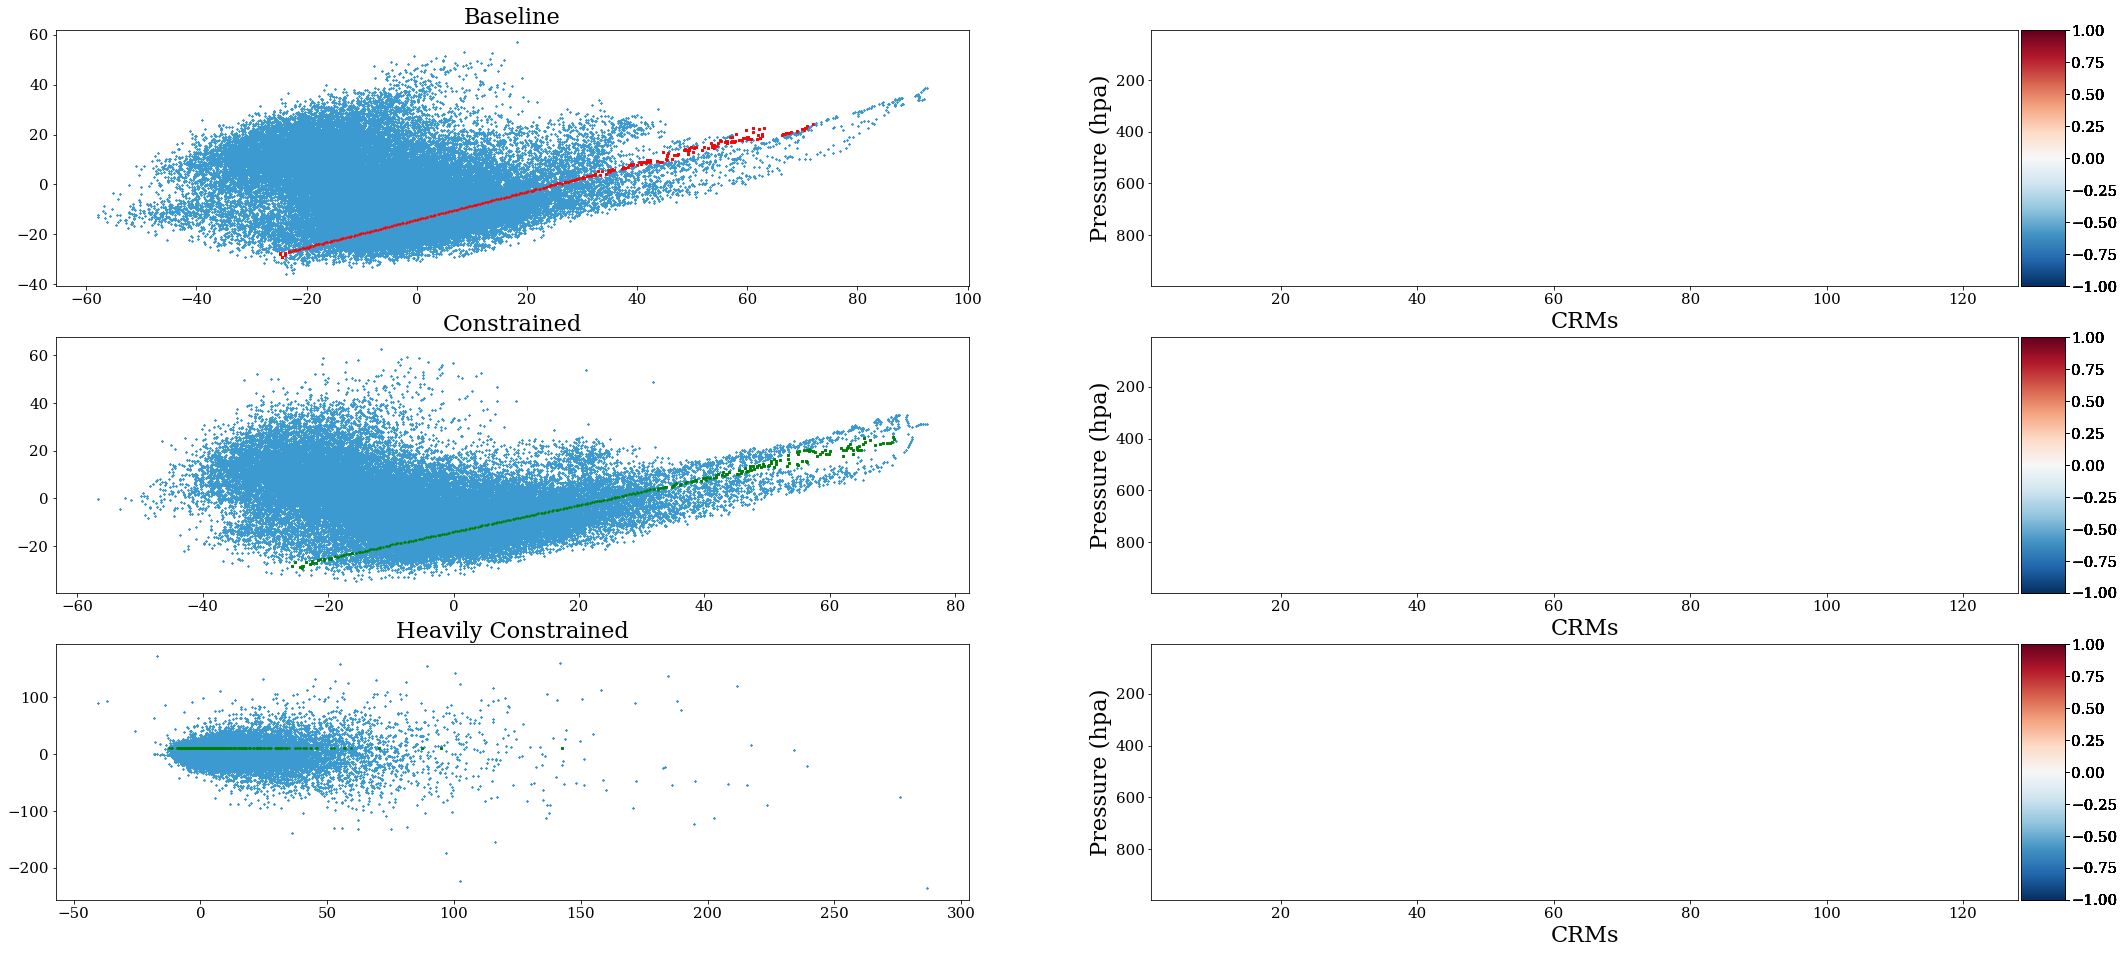

In [79]:
def rotated_latent_animation(h_coords, h_coords_three, latent_space_one, latent_space_two, latent_space_three, xdist, ydist, X, Z, h_images_one, h_images_two, h_images_three, hline_one, hline_two, hline_three):
    fig, ax = plt.subplots(3,2, figsize=(36,16))
    feat_list = []
    #the real total you need
    num_steps = len(h_coords)
    #num_steps = 10
    cmap= "RdBu_r"
    
    dummy_horz_one = np.zeros(shape=(30,128))
    dummy_horz_one[:,:] = np.nan
    dummy_horz_two = np.zeros(shape=(30,128))
    dummy_horz_two[:,:] = np.nan
    dummy_horz_three = np.zeros(shape=(30,128))
    dummy_horz_three[:,:] = np.nan
    count = 29
    for i in range(num_steps):
        
        for j in range(len(dummy_horz_three)):
            dummy_horz_three[count,:] = h_images_three[i,j,:]
            if i <= len(h_coords) -1:
                dummy_horz_two[count,:] = h_images_two[i,j,:]
                dummy_horz_one[count,:] = h_images_one[i,j,:]
            else:
                dummy_horz_two[count,:] = h_images_two[-1,j,:]
                dummy_horz_one[count,:] = h_images_one[-1,j,:]
            count = count-1
        
        h_rect_three = patches.Rectangle((h_coords_three[i,0],h_coords_three[i,1]),xdist,ydist,linewidth=4,edgecolor='black',facecolor='none')
        if i <= len(h_coords) -1:
            h_rect_two = patches.Rectangle((h_coords[i,0],h_coords[i,1]),xdist,ydist,linewidth=4,edgecolor='black',facecolor='none')
            h_rect_one = patches.Rectangle((h_coords[i,0],h_coords[i,1]),xdist,ydist,linewidth=4,edgecolor='black',facecolor='none')
        
        else:
            h_rect_two = patches.Rectangle((h_coords[-1,0],h_coords[-1,1]),xdist,ydist,linewidth=4,edgecolor='black',facecolor='none')
            h_rect_one = patches.Rectangle((h_coords[-1,0],h_coords[-1,1]),xdist,ydist,linewidth=4,edgecolor='black',facecolor='none')
        
        
        
        ax[0,0].scatter(latent_space_one[:, 0], latent_space_one[:, 1], c="#3D9AD1", s=0.4,  animated=True)
        ax[0,0].scatter(x=hline_one[:, 0], y=hline_one[:, 1], c="Red", s=2.0,  animated=True)
        cs0 = ax[0,0].add_patch(h_rect_one)
        
        ax[1,0].scatter(latent_space_two[:, 0], latent_space_two[:, 1], c="#3D9AD1", s=0.4,  animated=True)
        ax[1,0].scatter(x=hline_two[:, 0], y=hline_two[:, 1], c="Green", s=2.0, animated=True)
        cs2 = ax[1,0].add_patch(h_rect_two)
        
        ax[2,0].scatter(latent_space_three[:, 0], latent_space_three[:, 1], c="#3D9AD1", s=0.4,  animated=True)
        ax[2,0].scatter(x=hline_three[:, 0], y=hline_three[:, 1], c="Green", s=2.0, animated=True)
        cs3 = ax[2,0].add_patch(h_rect_three)
        
        
        cs4 = ax[1,1].pcolor(X, Z, dummy_horz_two, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        cs5 = ax[2,1].pcolor(X, Z, dummy_horz_three, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        
        cs1  = ax[0,1].pcolor(X, Z, dummy_horz_one, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        
        
        ax[0,1].set_xlabel("CRMs", fontsize=fz*1.5)
        ax[1,1].set_xlabel("CRMs", fontsize=fz*1.5)
        ax[0,1].set_ylabel("Pressure (hpa)", fontsize=fz*1.5)
        ax[1,1].set_ylabel("Pressure (hpa)", fontsize=fz*1.5)
        ax[2,1].set_xlabel("CRMs", fontsize=fz*1.5)
        ax[2,1].set_ylabel("Pressure (hpa)", fontsize=fz*1.5)
        
        ax[0,0].set_title("Baseline", fontsize=fz*1.5)
        ax[1,0].set_title("Constrained", fontsize=fz*1.5)
        ax[2,0].set_title("Heavily Constrained", fontsize=fz*1.5)
        
        y_ticks = np.array([1000, 800, 600, 400, 200])
        ax[1,1].set_yticklabels(y_ticks)
        ax[0,1].set_yticklabels(y_ticks)
        ax[2,1].set_yticklabels(y_ticks)
        
        divider = make_axes_locatable(ax[1,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs4, cax=cax)
        divider = make_axes_locatable(ax[0,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs1, cax=cax)
        divider = make_axes_locatable(ax[2,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs5, cax=cax)
        
        feat_list.append([cs2, cs3, cs1, cs0, cs5, cs4])
        

        count = 29 
        
    ani = animation.ArtistAnimation(fig, feat_list, interval = 125, blit = False, repeat = True)
    ani.save('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/Animations/w_500_no_square_horz.mp4')
    plt.show()
        
    
#rotated_latent_animation(shallow_line, horz_line_latent_sorted, z_test_tsne_saved_370, z_test_tsne_saved_368, z_test_tsne_369, 0.4, 1.5, Xs, Zs, shallow_images_370, shallow_images_368, horz_line_images_sorted, shallow_list_370, shallow_list_368, horz_line_latent_sorted)

## Y Axis Comparison

In [5]:
z_test_tsne_370 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/2D_PCA_Latent_Space__370.npy")
z_test_tsne_368 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/2D_PCA_Latent_Space__368.npy")
z_test_tsne_369 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/2D_PCA_Latent_Space__369.npy")



In [10]:
vert_line = np.squeeze(np.argwhere(np.logical_and(z_test_tsne_369[:,0] > 38.5, z_test_tsne_369[:,0] < 41.5)))

vert_line_images = Test_Images[vert_line,:,:]
vert_line_latent = z_test_tsne_369[vert_line,:]

vert_line_images_sorted = np.empty(vert_line_images.shape)
vert_line_latent_sorted = np.empty(vert_line_latent.shape)

count = 0
for i in range(len(vert_line_images_sorted)):
    ind = np.nanargmin(vert_line_latent[:,1])
    vert_line_images_sorted[count,:] = vert_line_images[ind,:]
    vert_line_latent_sorted[count,:] = vert_line_latent[ind,:]
    vert_line_latent[ind,:] = np.array([10000.0,10000.0])
    #vert_line_image[ind,:] = np.array([1000.0,1000.0])
    count = count+1

In [11]:
vert_line_latent_sorted.shape

(276, 2)

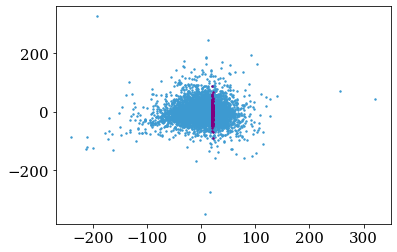

In [81]:
plt.scatter(x=z_test_tsne_369[:, 0], y=z_test_tsne_369[:, 1], c="#3D9AD1", s=2.0)
plt.scatter(x=vert_line_latent_sorted[:, 0], y=vert_line_latent_sorted[:, 1], c="Purple", s=2.0)
plt.show()

In [82]:
#vert_line_latent_sorted = np.flip(vert_line_latent_sorted, axis=0)
#vert_line_images_sorted = np.flip(vert_line_images_sorted, axis=0)

In [95]:
x0, y0 = -30, 25 # These are in _pixel_ coordinates!!
x1, y1 = 20, -15
length = int(np.hypot(x1-x0, y1-y0))
x, y = np.linspace(x0, x1, 4*length), np.linspace(y0, y1, 4*length)

In [96]:
shallow_line = np.zeros(shape=(len(x),2))
shallow_line[:,0] = x
shallow_line[:,1] = y

In [97]:
shallow_line.shape

(256, 2)

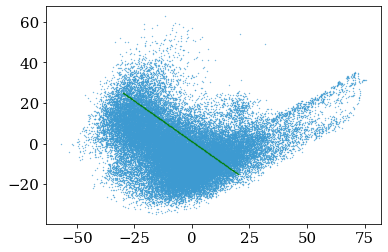

In [98]:
plt.scatter(x=z_test_tsne_368[:, 0], y=z_test_tsne_368[:, 1], c="#3D9AD1", s=0.1)
plt.scatter(x=shallow_line[:, 0], y=shallow_line[:, 1], c="green", s=0.1)
plt.show()

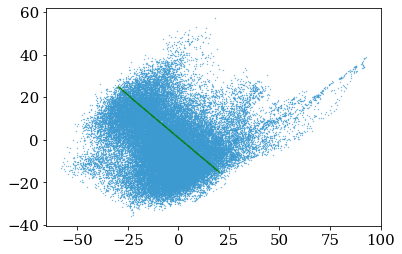

In [99]:
plt.scatter(x=z_test_tsne_370[:, 0], y=z_test_tsne_370[:, 1], c="#3D9AD1", s=0.1)
plt.scatter(x=shallow_line[:, 0], y=shallow_line[:, 1], c="green", s=0.1)
plt.show()

In [100]:
z_test_tsne_saved_368 = np.zeros(z_test_tsne_368.shape)
z_test_tsne_saved_370 = np.zeros(z_test_tsne_370.shape)
for i in range(len(z_test_tsne_368)):
    z_test_tsne_saved_368[i,:] = z_test_tsne_368[i,:]
    z_test_tsne_saved_370[i,:] = z_test_tsne_370[i,:]

In [101]:
shallow_list_368, shallow_images_368 = list_maker(shallow_line, z_test_tsne_368, Test_Images)
shallow_list_370, shallow_images_370 = list_maker(shallow_line, z_test_tsne_370, Test_Images)

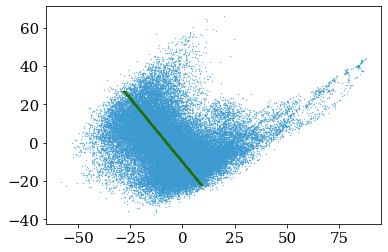

In [105]:
plt.scatter(x=z_test_tsne_saved_368[:, 0], y=z_test_tsne_saved_368[:, 1], c="#3D9AD1", s=0.1)
plt.scatter(x=shallow_line[:, 0], y=shallow_line[:, 1], c="red", s=0.5)
plt.scatter(x=shallow_list_368[:, 0], y=shallow_list_368[:, 1], c="green", s=0.5)

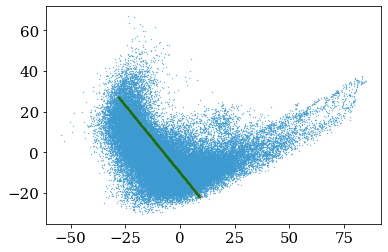

In [106]:
plt.scatter(x=z_test_tsne_saved_370[:, 0], y=z_test_tsne_saved_370[:, 1], c="#3D9AD1", s=0.1)
plt.scatter(x=shallow_line[:, 0], y=shallow_line[:, 1], c="red", s=0.5)
plt.scatter(x=shallow_list_370[:, 0], y=shallow_list_370[:, 1], c="green", s=0.5)

In [107]:
shallow_line = np.flip(shallow_line, axis=0)
shallow_list_368 = np.flip(shallow_list_368, axis=0)
shallow_images_368 = np.flip(shallow_images_368, axis=0)

shallow_list_370 = np.flip(shallow_list_370, axis=0)
shallow_images_370 = np.flip(shallow_images_370, axis=0)

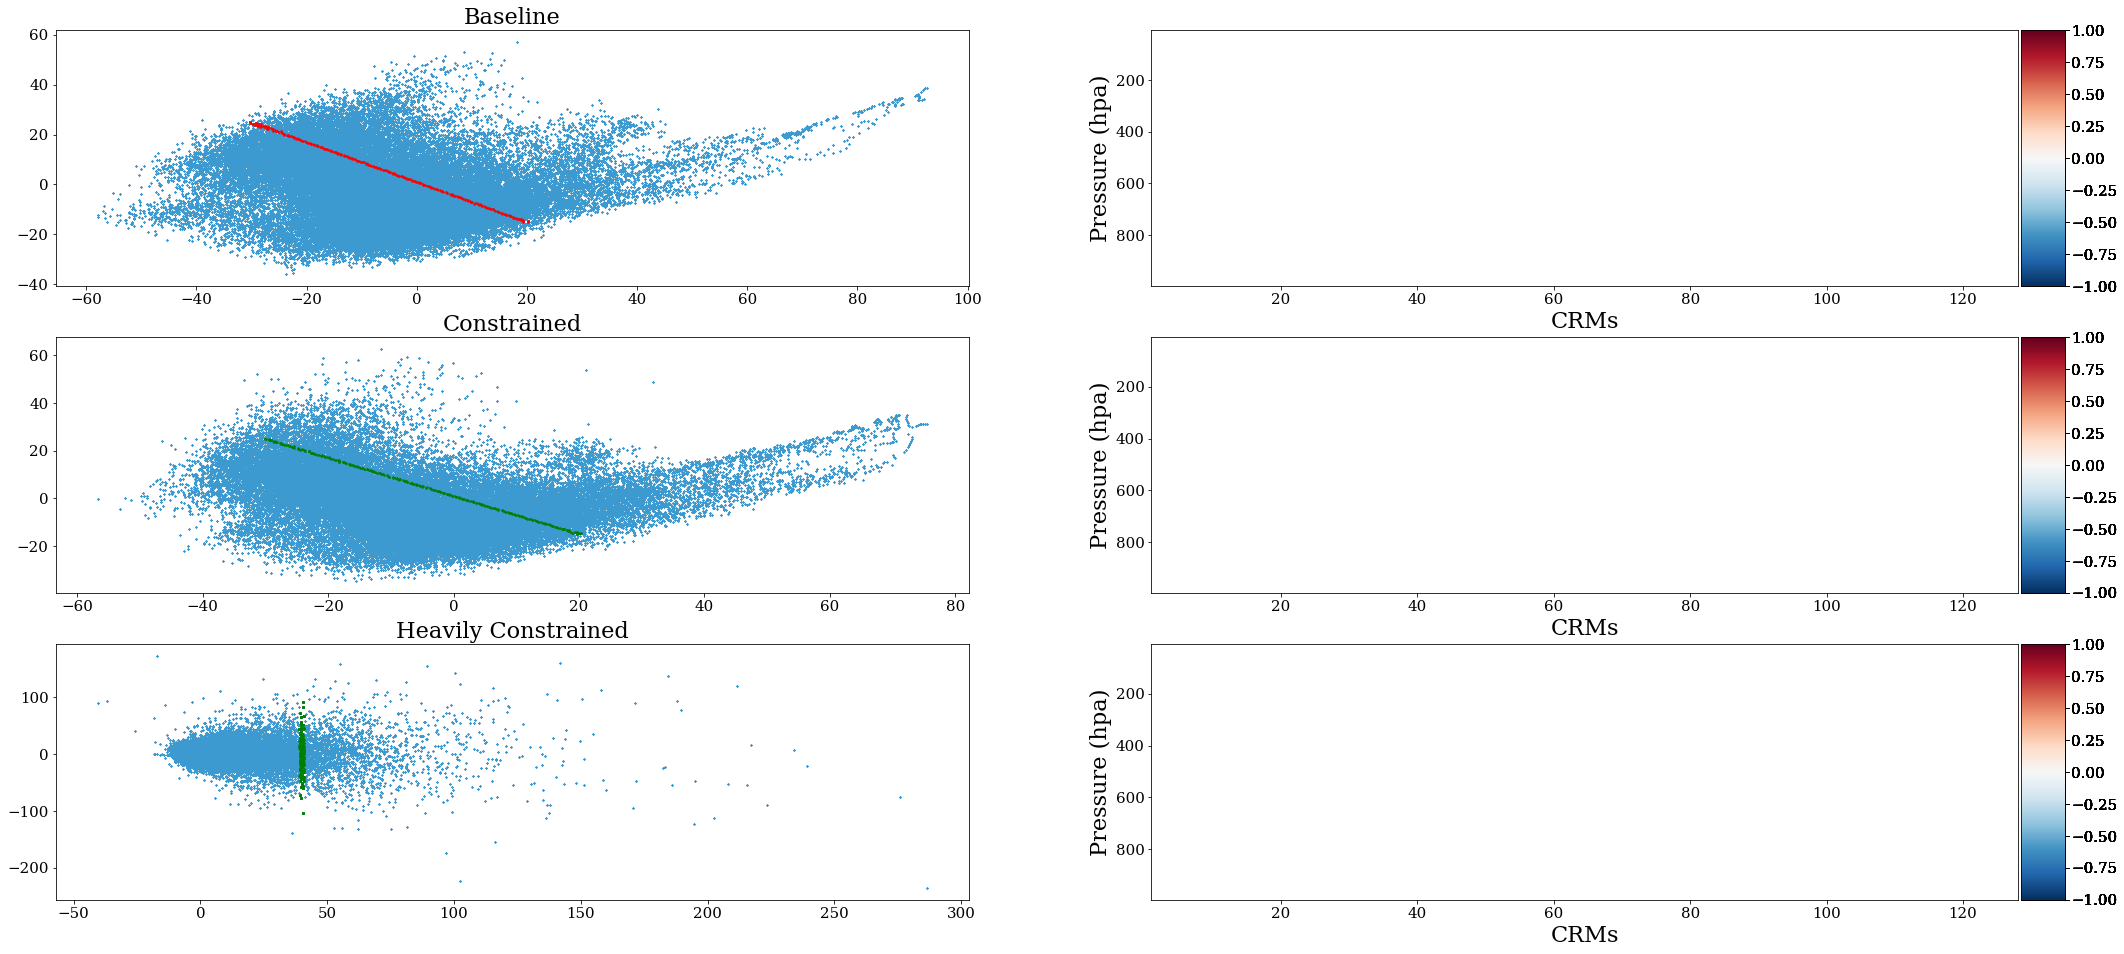

In [104]:
def rotated_latent_animation(h_coords, h_coords_three, latent_space_one, latent_space_two, latent_space_three, xdist, ydist, X, Z, h_images_one, h_images_two, h_images_three, hline_one, hline_two, hline_three):
    fig, ax = plt.subplots(3,2, figsize=(36,16))
    feat_list = []
    #the real total you need
    num_steps = len(h_coords)
    #num_steps = 10
    cmap= "RdBu_r"
    
    dummy_horz_one = np.zeros(shape=(30,128))
    dummy_horz_one[:,:] = np.nan
    dummy_horz_two = np.zeros(shape=(30,128))
    dummy_horz_two[:,:] = np.nan
    dummy_horz_three = np.zeros(shape=(30,128))
    dummy_horz_three[:,:] = np.nan
    count = 29
    for i in range(num_steps):
        
        for j in range(len(dummy_horz_three)):
            dummy_horz_three[count,:] = h_images_three[i,j,:]
            if i <= len(h_coords) -1:
                dummy_horz_two[count,:] = h_images_two[i,j,:]
                dummy_horz_one[count,:] = h_images_one[i,j,:]
            else:
                dummy_horz_two[count,:] = h_images_two[-1,j,:]
                dummy_horz_one[count,:] = h_images_one[-1,j,:]
            count = count-1
        
        h_rect_three = patches.Rectangle((h_coords_three[i,0],h_coords_three[i,1]),xdist,ydist,linewidth=4,edgecolor='black',facecolor='none')
        if i <= len(h_coords) -1:
            h_rect_two = patches.Rectangle((h_coords[i,0],h_coords[i,1]),xdist,ydist,linewidth=4,edgecolor='black',facecolor='none')
            h_rect_one = patches.Rectangle((h_coords[i,0],h_coords[i,1]),xdist,ydist,linewidth=4,edgecolor='black',facecolor='none')
        
        else:
            h_rect_two = patches.Rectangle((h_coords[-1,0],h_coords[-1,1]),xdist,ydist,linewidth=4,edgecolor='black',facecolor='none')
            h_rect_one = patches.Rectangle((h_coords[-1,0],h_coords[-1,1]),xdist,ydist,linewidth=4,edgecolor='black',facecolor='none')
        
        
        
        ax[0,0].scatter(latent_space_one[:, 0], latent_space_one[:, 1], c="#3D9AD1", s=0.4,  animated=True)
        ax[0,0].scatter(x=hline_one[:, 0], y=hline_one[:, 1], c="Red", s=2.0,  animated=True)
        cs0 = ax[0,0].add_patch(h_rect_one)
        
        ax[1,0].scatter(latent_space_two[:, 0], latent_space_two[:, 1], c="#3D9AD1", s=0.4,  animated=True)
        ax[1,0].scatter(x=hline_two[:, 0], y=hline_two[:, 1], c="Green", s=2.0, animated=True)
        cs2 = ax[1,0].add_patch(h_rect_two)
        
        ax[2,0].scatter(latent_space_three[:, 0], latent_space_three[:, 1], c="#3D9AD1", s=0.4,  animated=True)
        ax[2,0].scatter(x=hline_three[:, 0], y=hline_three[:, 1], c="Green", s=2.0, animated=True)
        cs3 = ax[2,0].add_patch(h_rect_three)
        
        
        cs4 = ax[1,1].pcolor(X, Z, dummy_horz_two, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        cs5 = ax[2,1].pcolor(X, Z, dummy_horz_three, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        
        cs1  = ax[0,1].pcolor(X, Z, dummy_horz_one, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        
        
        ax[0,1].set_xlabel("CRMs", fontsize=fz*1.5)
        ax[1,1].set_xlabel("CRMs", fontsize=fz*1.5)
        ax[0,1].set_ylabel("Pressure (hpa)", fontsize=fz*1.5)
        ax[1,1].set_ylabel("Pressure (hpa)", fontsize=fz*1.5)
        ax[2,1].set_xlabel("CRMs", fontsize=fz*1.5)
        ax[2,1].set_ylabel("Pressure (hpa)", fontsize=fz*1.5)
        
        ax[0,0].set_title("Baseline", fontsize=fz*1.5)
        ax[1,0].set_title("Constrained", fontsize=fz*1.5)
        ax[2,0].set_title("Heavily Constrained", fontsize=fz*1.5)
        
        y_ticks = np.array([1000, 800, 600, 400, 200])
        ax[1,1].set_yticklabels(y_ticks)
        ax[0,1].set_yticklabels(y_ticks)
        ax[2,1].set_yticklabels(y_ticks)
        
        divider = make_axes_locatable(ax[1,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs4, cax=cax)
        divider = make_axes_locatable(ax[0,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs1, cax=cax)
        divider = make_axes_locatable(ax[2,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs5, cax=cax)
        
        feat_list.append([cs2, cs3, cs1, cs0, cs5, cs4])
        

        count = 29 
        
    ani = animation.ArtistAnimation(fig, feat_list, interval = 125, blit = False, repeat = True)
    ani.save('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/Animations/w_500_no_square_vert.mp4')
    plt.show()
        
    
rotated_latent_animation(shallow_line, vert_line_latent_sorted, z_test_tsne_saved_370, z_test_tsne_saved_368, z_test_tsne_369, 0.4, 1.5, Xs, Zs, shallow_images_370, shallow_images_368, vert_line_images_sorted, shallow_list_370, shallow_list_368, vert_line_latent_sorted)